In [1]:
from torch.fft import rfft
from torch.fft import irfft
import torch
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [ ]:
import numpy as np
frequency_classes = [50, 200, 350]
for class_ in range(8):
    print(class_)
    for freq_idx in range(len(frequency_classes)):
        if class_ & (1 << freq_idx): # Check if the frequency is in the class
            freq = frequency_classes[freq_idx]
            print(freq)
class_

50
200


np.int64(3)

In [2]:
# Define signal parameters
fs = 80  # Sampling frequency in Hz
N = 80   # Number of samples (1-second signal)
length = 1 # Length of the signal in seconds
t = torch.arange(N*length) / fs  # Time vector

In [3]:
# Create a test signal: a sum of two sine waves. Frequencies should be less than fs/2
freq1 = 15  # Frequency of first sine wave in Hz
freq2 = 20 # Frequency of second sine wave in Hz
signal = torch.sin(2 * torch.pi * freq1 * t) + torch.sin(2 * torch.pi * freq2 * t)

# Add noise to the signal
noise = 0.5 * torch.randn(N*length)  # Gaussian noise
signal += noise

In [4]:
# Compute the real FFT
fft_result = rfft(signal)
# Compute frequency axis
frequencies = torch.fft.rfftfreq(N*length, d=1/fs)

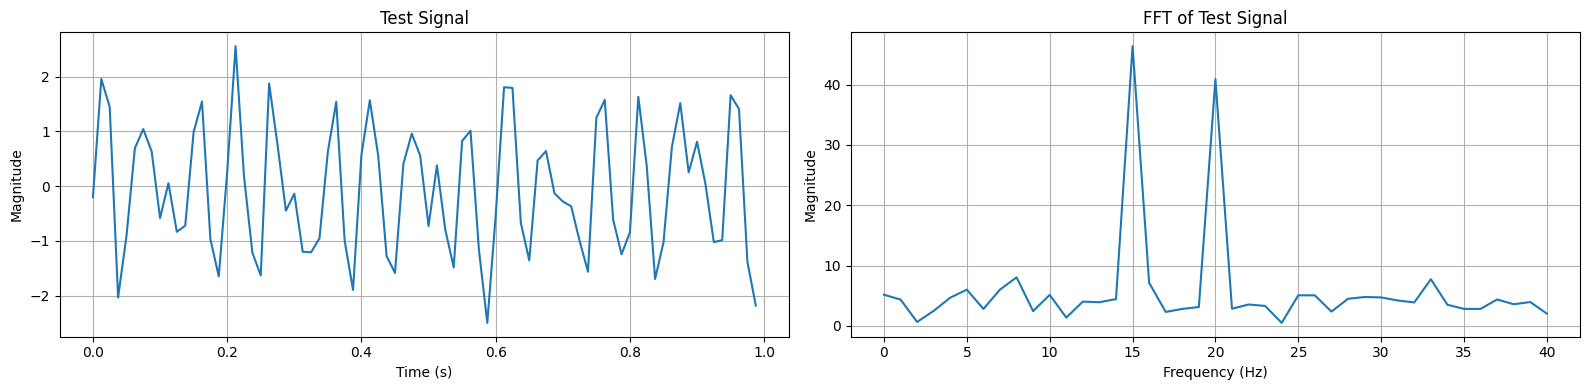

In [5]:
# Plot the magnitude spectrum and time signal side-by-side
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Time signal
axs[0].plot(t.numpy(), signal.numpy())
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('Test Signal')
axs[0].grid()

# Magnitude spectrum
axs[1].plot(frequencies.numpy(), torch.abs(fft_result).numpy())
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('FFT of Test Signal')
axs[1].grid()


plt.tight_layout()
plt.show()

In [6]:
# Compute the inverse FFT
reconstructed_signal = irfft(fft_result, n=N*length)

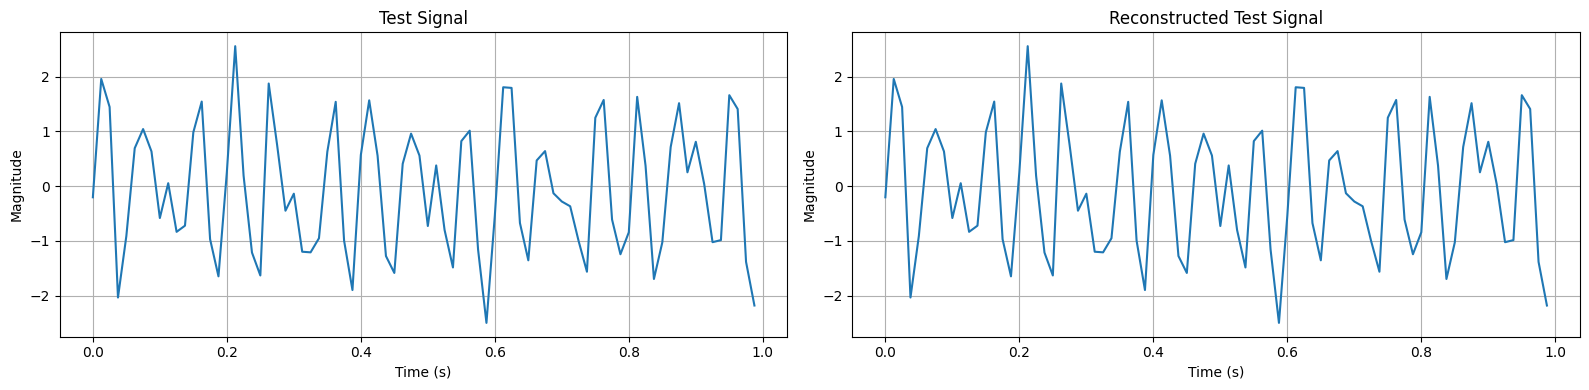

In [7]:
# Plot the magnitude spectrum and time signal side-by-side
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Time signal
axs[0].plot(t.numpy(), signal.numpy())
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('Test Signal')
axs[0].grid()

# Magnitude spectrum
axs[1].plot(t.numpy(), reconstructed_signal.numpy())
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Reconstructed Test Signal')
axs[1].grid()


plt.tight_layout()
plt.show()

In [8]:
# Save the test signal to a WAV file
# wavfile.write('test_signal.wav', fs, signal.numpy())